In [93]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles

In [120]:
def softmax(z):
    e_pa = np.exp(z)
    temp  = e_pa
    e_pa = e_pa/np.sum(temp,axis = 1,keepdims = True)
    return e_pa

class NeuralNetwork:
    def __init__(self,input_size ,layers,output_size):
        np.random.seed(0)
        model = {}
        
        model["W1"] = np.random.randn(input_size,layers[0])
        model["b1"] = np.zeros((1,layers[0]))
        
        model["W2"] = np.random.randn(layers[0],layers[1])
        model["b2"] = np.zeros((1,layers[1]))
        
        model["W3"] = np.random.randn(layers[1],output_size)
        model["b3"] = np.zeros((1,output_size))
        
        self.model = model
 
    def forward_prop(self,x):
        W1,W2,W3 = self.model["W1"],self.model["W2"],self.model["W3"]
        b1,b2,b3 = self.model["b1"],self.model["b2"],self.model["b3"]
        
        z1 = np.dot(x,W1)+b1
        a1 = np.tanh(z1)
        
        z2  = np.dot(a1,W2)+b2
        a2 = np.tanh(z2)
        
        z3 = np.dot(a2,W3)+b3
        y_ = softmax(z3)
        
        self.activations = (a1,a2,y_)
        
        return y_
    def backprop(self,x,y,learning_rate):
        W1,W2,W3 = self.model["W1"],self.model["W2"],self.model["W3"]
        b1,b2,b3 = self.model["b1"],self.model["b2"],self.model["b3"]
        
        a1,a2,y_ = self.activations
        m = x.shape[0]

        delta3 = y_-y
        dw3 = np.dot(a2.T,delta3)
        db3 = np.sum(delta3,axis = 0)/float(m)
        
        delta2 = (1-np.square(a2))*np.dot(delta3,W3.T)
        dw2 = np.dot(a1.T,delta2)
        db2 = np.sum(delta2,axis = 0)/float(m)
        
        delta1 = (1-np.square(a1))*np.dot(delta2,W2.T)
        dw1 = np.dot(x.T,delta1)
        db1 = np.sum(delta1,axis = 0)/float(m)
        
        #updating the variables 
        self.model["W1"] -= learning_rate*dw1
        self.model["b1"] -= learning_rate*db1
        
        self.model["W2"] -= learning_rate*dw2
        self.model["b2"] -= learning_rate*db2
        
        self.model["W3"] -= learning_rate*dw3
        self.model["b3"] -= learning_rate*db3
    
    def predict(self,x):
        y_out = self.forward(x)
        return np.argmax(y_out,axis = 1)
    def summary(self):
        
        W1,W2,W3 = self.model["W1"],self.model["W2"],self.model["W3"]
        b1,b2,b3 = self.model["b1"],self.model["b2"],self.model["b3"]
       
        a1,a2,y_ = self.activations

        print("W1 :",W1.shape)
        print("A1 :",a1.shape)
        
        print("W2 :",W2.shape)
        print("A2 :",a2.shape)
        
        print("W3 :",W3.shape)
        print("Y_out :",y_.shape)
        
        
    

In [121]:
def loss(y_out,p):
    l = -np.mean(y_out*np.log(p))
    return l

In [122]:
def onehot(y,depth):
    m  = y.shape[0]
    y_hot = np.zeros((m,depth))
    y_hot[np.arange(m),y]= 1
    
    return y_hot

In [123]:
make_circles?

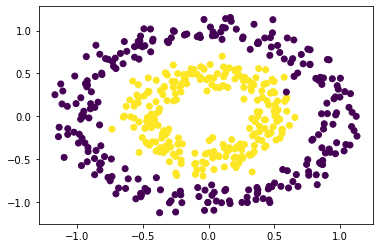

In [124]:
x,y = make_circles(n_samples = 500,shuffle = True,noise =0.09,random_state = 9,factor =0.5 )
plt.scatter(x[:,0],x[:,1],c = y)

In [125]:
y = onehot(y,2)
print(y)

[[0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 

In [126]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2)

In [127]:
print(x_train.shape)
print(x_test.shape)

(400, 2)
(100, 2)


In [136]:
model  = NeuralNetwork(2,[3,5],2)

In [137]:
def train(x,y,model,epochs,learning_rate,logs = True):
    train_loss = []
    for i in range(epochs):
        y_ = model.forward_prop(x)
        l = loss(y,y_)
        train_loss.append(l)
        model.backprop(x,y,learning_rate)
        if(logs):
            print("epochs : %d loss : %.4f"%(i,l))

    return train_loss      

In [140]:
loss1 = train(x_train,y_train,model,epochs =1000,learning_rate=0.001)

epochs : 0 loss : 0.3453
epochs : 1 loss : 0.3453
epochs : 2 loss : 0.3452
epochs : 3 loss : 0.3452
epochs : 4 loss : 0.3452
epochs : 5 loss : 0.3452
epochs : 6 loss : 0.3451
epochs : 7 loss : 0.3451
epochs : 8 loss : 0.3451
epochs : 9 loss : 0.3451
epochs : 10 loss : 0.3450
epochs : 11 loss : 0.3450
epochs : 12 loss : 0.3450
epochs : 13 loss : 0.3450
epochs : 14 loss : 0.3450
epochs : 15 loss : 0.3449
epochs : 16 loss : 0.3449
epochs : 17 loss : 0.3449
epochs : 18 loss : 0.3449
epochs : 19 loss : 0.3448
epochs : 20 loss : 0.3448
epochs : 21 loss : 0.3448
epochs : 22 loss : 0.3448
epochs : 23 loss : 0.3448
epochs : 24 loss : 0.3447
epochs : 25 loss : 0.3447
epochs : 26 loss : 0.3447
epochs : 27 loss : 0.3447
epochs : 28 loss : 0.3446
epochs : 29 loss : 0.3446
epochs : 30 loss : 0.3446
epochs : 31 loss : 0.3446
epochs : 32 loss : 0.3446
epochs : 33 loss : 0.3445
epochs : 34 loss : 0.3445
epochs : 35 loss : 0.3445
epochs : 36 loss : 0.3445
epochs : 37 loss : 0.3445
epochs : 38 loss : 0.3

epochs : 504 loss : 0.3570
epochs : 505 loss : 0.3701
epochs : 506 loss : 0.3434
epochs : 507 loss : 0.3507
epochs : 508 loss : 0.3332
epochs : 509 loss : 0.3375
epochs : 510 loss : 0.3257
epochs : 511 loss : 0.3284
epochs : 512 loss : 0.3202
epochs : 513 loss : 0.3220
epochs : 514 loss : 0.3160
epochs : 515 loss : 0.3174
epochs : 516 loss : 0.3130
epochs : 517 loss : 0.3141
epochs : 518 loss : 0.3106
epochs : 519 loss : 0.3116
epochs : 520 loss : 0.3089
epochs : 521 loss : 0.3098
epochs : 522 loss : 0.3075
epochs : 523 loss : 0.3084
epochs : 524 loss : 0.3064
epochs : 525 loss : 0.3074
epochs : 526 loss : 0.3056
epochs : 527 loss : 0.3066
epochs : 528 loss : 0.3050
epochs : 529 loss : 0.3060
epochs : 530 loss : 0.3045
epochs : 531 loss : 0.3056
epochs : 532 loss : 0.3041
epochs : 533 loss : 0.3052
epochs : 534 loss : 0.3038
epochs : 535 loss : 0.3049
epochs : 536 loss : 0.3035
epochs : 537 loss : 0.3047
epochs : 538 loss : 0.3032
epochs : 539 loss : 0.3044
epochs : 540 loss : 0.3029
e

epochs : 872 loss : 0.2637
epochs : 873 loss : 0.2683
epochs : 874 loss : 0.2635
epochs : 875 loss : 0.2681
epochs : 876 loss : 0.2633
epochs : 877 loss : 0.2679
epochs : 878 loss : 0.2631
epochs : 879 loss : 0.2677
epochs : 880 loss : 0.2629
epochs : 881 loss : 0.2675
epochs : 882 loss : 0.2627
epochs : 883 loss : 0.2674
epochs : 884 loss : 0.2625
epochs : 885 loss : 0.2672
epochs : 886 loss : 0.2623
epochs : 887 loss : 0.2670
epochs : 888 loss : 0.2621
epochs : 889 loss : 0.2668
epochs : 890 loss : 0.2619
epochs : 891 loss : 0.2666
epochs : 892 loss : 0.2617
epochs : 893 loss : 0.2664
epochs : 894 loss : 0.2615
epochs : 895 loss : 0.2662
epochs : 896 loss : 0.2613
epochs : 897 loss : 0.2661
epochs : 898 loss : 0.2610
epochs : 899 loss : 0.2659
epochs : 900 loss : 0.2608
epochs : 901 loss : 0.2657
epochs : 902 loss : 0.2606
epochs : 903 loss : 0.2655
epochs : 904 loss : 0.2604
epochs : 905 loss : 0.2653
epochs : 906 loss : 0.2602
epochs : 907 loss : 0.2651
epochs : 908 loss : 0.2600
e

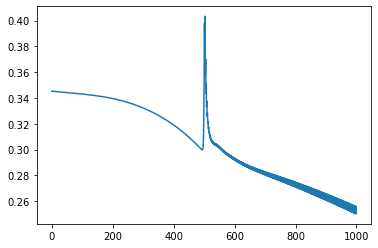

In [141]:
plt.plot(loss1)